Stefan Heren
MAE 6286

- - -

## Orbit Propagation

This module will provide a brief overview of the satellite lexicon, as well as some uses of orbit propagation. The Two-Body problem will be presented an analyzed. The first method used to solve the two-body problem will be the 4th order implicit Runge Kutta method (IRK). Then an analytical solution will be provided. The answers will be compared to determine the effectiveness of the numerical solution. Afterwards, an introduction to [Systems Tool Kit](http://www.agi.com/default.aspx) will be provided, which is an industry standard for anything space related. A limited version can be downloaded for free. Finally, examples of connecting to STK utilizing Python will be provided to show the power of Python.

***

#### What is Orbit Propagation and Why is it Important?
Orbital propagation is used to determine the flight path of a spacecraft. The orbit of a spacecraft is an incredibly important thing to know for many reasons. The first reason to propagate a spacecraft is to avoid other space objects. There are an estimated 21,000 objects orbiting the Earth that are 10 cm or larger. Any collision at orbital speeds will destroy a satellite, which are typically multi-million dollar investments. Additionally, every nation state has an interest in avoiding space collisions to avoid a possibility of the [Kessler Syndrome](https://en.wikipedia.org/wiki/Kessler_syndrome). Essentially, the theory states that a collision between two satellites can cause more debris thus cascading into more collisions and ultimately rendering space too dangerous for future satellites and exploration.

Additionally, operators of the satellite need to know where the spacecraft is to avoid errors and mistakes in mission planning. In the case of the Hubble Telescope, orbit propagation was used to determine when and where NASA would be able to rendezvous with it to install a new mirror. Orbit propagation is used for NASA's imagery satellites used for Google Earth. The operators at NASA need to know exactly where the spacecraft will fly over, so they can schedule when and where to take pictures.

In terms of analyses, orbit propagation is crucial because it provides all of the state vectors (position and velocity) for the spacecraft at each time step. For communication satellites, it is vital to know where the satellite is relative to the ground object. All of the calculations needed to conduct a link budget analysis, where you determine if the signal is strong enough to close the link (if the signal-to-noise ratio, SNR, is too low, then you cannot get the signal), require the state vectors of the satellite and the ground object. It would be impossible to engineers to accurately predict satellite performance without orbit propagation techniques.

Finally, orbit propagation is used to help design the spacecraft and keep it in space. When engineers design a spacecraft, one of the most important factors in it's design is the location of its orbit. Different orbital regimes will be discussed further below, however, different regions around the Earth are more severe than others. If the spacecraft is in Low-Earth Orbit (LEO) it experiences extremely harsh radiation, so all of the critical components require extra shielding to prevent them from being destroyed. Additionally, atmospheric drag causes a constant degradation of height in the orbit, so extra fuel is required to keep the spacecraft at the designed orbit. However, at a Geosynchronous Orbit (GEO), there is no atmospheric drag. On the other hand, getting out to a GEO orbit is costly due to the larger rockets required at launch. Engineers use orbit propagation to help determine optimal orbits for their mission, which drives the design of the spacecraft. Additionally, orbit propagation is what NASA engineers use to determine the flight path of deep space spacecraft like Voyager and the future Mars mission flights. 

- - -

#### How to Model an Orbit

There are quite a few different ways to model an orbit. Ultimately, a position and velocity vector are needed relative to a coordinate frame to determine the location of a spacecraft. In order to get to that point, however, let's go over the **6 Classical Orbital Elements**. 

There are 6 orbital elements used to represent an orbit in terms of scalars and angles.
* Semi-major Axis: $a$
* Eccentricity: $e$
* Inclination: $i$
* Right Ascension of the Ascending Node (RAAN): $\Omega$
* Argument of Perigee: $\omega$
* True Anomaly: $\nu$ or Mean Anomaly: $\mu$

The semi-major axis, $a$, is half of the major axis (sum of radius of apogee and radius of perigee) for an elliptical orbit and the radius for a circular orbit. 

The eccentricity, $e$, is the shape of the ellipse. Essentially it describes how circular or elliptical the orbit is. An $e$ value of 0.0 means a completely circular orbit, while an increase in e increases the elongation of the major axis. Typical ranges for an elliptical orbit are $ 0.1 < e < 1$. Meanwhile, an e of 1 is a parabolic orbit and anything greater than 1 is a hyperbolic orbit. Parabolic and hyperbolic orbits are used for deep space missions and are not applicable to this module.

The inclination, $i$, is the tilt of the orbit relative to the Earth's equatorial plane. The range of $i$ is $0 <= i <= 180$ degrees. When $i$ is at 0 or 180, it is called an equatorial orbit. Inclined orbits that are less than 90 degrees are called prograde orbits, while an inclination greater than 90 degrees is called a retrograde orbit. Lastly, a 90 inclined orbit is called a polar orbit because the spacecraft will be passing directly over the poles.

The Right Ascension of the Ascending Node, $\Omega$ is the angle between the location of the orbit when it crosses the equatorial plane and a reference axis. Specifically, this is the angle in the equatorial plane measured positive eastward from the I unit vector, with respect to an IJK coordinate system, to the location of the ascending node [1]. The ascending node is the point on the equatorial plane where the spacecraft crosses the equator from south to north. The range of $\Omega$ is 0 to 360 degrees.

The Argument of Perigee, $\omega$, is the "swivel" of the orbit. In detail, it is the location of the closest point of the orbit (periapsis) and it is measured from the ascending node in the direction of the spacecraft's motion. The range of $\omega$ is 0 to 360 degrees.

Finally, the True Anomaly, $\nu$ is the spacecraft's current position relative to the periapsis. Meanwhile, the Mean Anomaly, $\mu$ is the position of the spacecraft at an epoch, which is just a point in time, along the orbit. The $\nu$ is a geometric angle on the orbital plane, but the $\mu$ is actually an angle that changes linearly with time corresponding to the orbit. Both values can be calculated from each other, but it is more common and convenient to use the $\mu$ as an orbital element rather than $\nu$ to better visualize the orbit. The range of both terms is 0 to 360 degrees.

Below is the orbital elements drawn relative to a reference plane, which could be the Earth's equatoral plane. The mean anomaly is not shown because it is actually derived from drawing a larger circle around the major axis, and then determining the angle from the larger circle. 

![Classical Orbital Elements](./555px-Orbit1.svg.png)

"Orbit1" by Lasunncty (talk). - Lasunncty (talk). Licensed under CC BY-SA 3.0 via Commons - https://commons.wikimedia.org/wiki/File:Orbit1.svg#/media/File:Orbit1.svg

***
#### Some More Orbit Terminology

We will be covering two types of orbits in this case, LEO's and GEO's. As mentioned above, low earth orbits are determined by an orbital altitude of 160 Km to 2000 Km. Typically, metric units are used for these measurements because most orbital mechanics literature uses the metric system for their constants. Meanwhile, geosynchronous/geostationary orbits (GEO) are circular orbits with an orbital altitude of about 35,700 Km. The unique thing about GEO's is that their orbital period is the same as the Earth's, which is one sidereal day. That means that the satellite is looking at the same section of the Earth all of the time. This is where Sirius XM and other TV communication satellites are located, since they need to stare at the same region to provide continuous service. However, a geostationary satellite has no inclination, so it sits at the same node all of the time. A geosynchronous orbit passes through the same point each day, but due to its inclination, it has upward and downward movement.

Now that some orbital mechanics lexicon has been covered, it is time to go into the heart of the problem.

### The Two-Body Problem
The governing equation for the two-body problem is the good old-fashioned $F = ma$. Adjusting the equation to include both masses leads to:

\begin{equation}
\ddot{r} = -\frac{G(m_E + m_{sat})}{r^2}\frac{\vec{r}}{r}
\end{equation}

$m_E$ and $m_{sat}$ are the masses of the Earth and satellite respectively. G is a gravitational constant, and r is the position vector. In the two-body problem, there are a few simplifications that go into the problem. First off, the satellite's mass is negligible compared to the Earth, which is indeed a valid assumption (until the Death Star becomes a reality). Additionally, there aren't any other external forces (this will change in the next analysis). With these in mind, the governing equation simplifies to:

\begin{equation}
\ddot{r} = -\frac{\mu}{r^2}\frac{\vec{r}}{r}
\end{equation}

The mass of the satellite is now neglected, and we replaced the $Gm_E$ term with the commonly used $\mu$.

#### A quick side-note
Another assumption that goes into the two-body problem is that the reference frame is inertial. If one were to continue to study spaceflight mechanics, they'd see an array of coordinate systems are used throughout the study. Two commonly used coordinate systems are Earth Centered Inertial (ECI) and Earth Centered Earth Fixed (ECEF also known as ECF). In a brief summary, ECI's x axis points at the vernal equinox and the z axis lays on the Earth's axis of rotation. The ECI reference frame stays fixed with the center of Earth and the stars. For now, this is the coordinate system that will be used to compare the $\vec{r}$ and $\vec{v}$ of the satellite. Information on these coordinate systems is not pertinent to this project, but if one wants to find more information, view references [1] and [2] for more information. I would not reference Wikipedia for this because a lot of their terminology is incorrect. Additionally, it doesn't explain the systems as well as the provided references.

********

### Getting into the Coding
There has been a lot of explanation up until this point, but that was to ensure no one gets lost in the code that is coming up. For this lesson, we are going to use the implicit Runge Kutta method to solve the two body problem and then compare it to the analytical solution.

The purpose of this is to show the error between the two methods as well as providing commentary on numerical methods in the professional workplace.

The implicit Runge Kutta method in this case is a fourth order accuracy method. Additionally, we gain the benefit of having stability even with larger step sizes. For reference, regular step sizes for orbit propagation range from 10 to 300 seconds for analyses spanning 86400 to 2,592,000 seconds (1 - 30 days) depending on the level of accuracy needed. When analyzing a satellite lifetime, the analysis can span 10 years, where the time step could be a half a day. In an explicit method, a time step that large would certainly produce large amounts of error over time. 

The formula for the implicit method was obtained from [3] and written as:

\begin{equation}
\zeta_i = f(t_0 + c_ih_i, \textbf{y}_0 + h\sum_{j = 1}^{s} a_{ij}\zeta_j)   
\end{equation} 
where
$$i = 1,2,...s$$
and the next time step will be given by:
\begin{equation}
\textbf{y}_1 = \textbf{y}_0 + h\sum_{j = 1}^{s} b_{i}\zeta_j
\end{equation}

The a, b, and c coefficients are pre-computed and given by the following matrix: 

![abc coefficients](./abc.png)

This info was found from [wikipedia for Butcher Tableau](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_method). The A coefficients are the 2x2 matrix, the C is the left-hand vector, and the B is the bottom vector.

In the numerical solution, we are taking the equations of motion and integrating them. Therefore, the answers we will be working with are **r** and **v** vectors. I will explain portions of the code as we go on, but first lets set up some basics for the code.

In [1]:
import numpy, scipy, math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

We imported numpy to handle our arrays as well as math because we will be using a lot of trigonometric functions. The rest of the calls there are for plotting purposes. We have scipy because we need to use an occassional function.

Next, lets get some of the constants out of the way. We will be using the same constants for the analytical solution we will see later.

In [2]:
#Constants
mu = 398600.4415 #Earth GM value in km^3/s^2
re = 6378.13699986 #mean value of the Earth's radius in Km
d2r = numpy.pi/180.0 #degrees to radians
r2d = 180.0/numpy.pi #radians to degrees

#Implicit Runge Kutta coefficients
A = numpy.array([[.25, 0.25 - (1/6)*math.sqrt(3)],[0.25 + (1/6)*math.sqrt(3), 0.25]])
B = numpy.array([0.5, 0.5])
C = numpy.array([0.5 - (1/6)*math.sqrt(3), 0.5 + (1.6)*math.sqrt(3)])

Next, we are going to be using quite a few coordinate system transformations here. Additionally, we are going to need to get our initial state vectors of the spacecraft from our arbitrarily defined classical orbital elements. 
* We are going to use some simple methods here and not handle special cases like equatorial circular orbits. In that case, the $\omega$ and $\Omega$ are 0 since $R_{periapsis} = R_{apoapsis} = R_{circle}$ and an equatorial orbit has an $i = 0$ meaning it never crosses the orbital plane.
* In the function below you will see a term p. This is the semi-parameter given by the equation $p = a(1-e^2)$
* Within this function we will be converting from perifocal coordinates to ECI. More information on perifocal coordinates can be found [online](https://en.wikipedia.org/wiki/Perifocal_coordinate_system), but essentially it is a local coordinate system for the orbit.

And the math behind all of this is given by:

These are our perifocal (PQW) position and velocity vectors.

\begin{align}\left[ \begin{array}{c} 
 r_p \\ r_q\\ r_w
\end{array} \right] 
=
\left [\begin{array}{c}
\frac{pcos(\nu)}{1+ecos(nu)} \\ \frac{psin(\nu)}{1+ecos(\nu)} \\ 0
\end{array}\right]
\end{align}

\begin{align}\left[ \begin{array}{c} 
 v_p \\ v_q\\ v_w
\end{array} \right] 
=
\left [\begin{array}{c}
-\sqrt{\frac{\mu}{p}}sin(\nu) \\ \sqrt{\frac{\mu}{p}}(e+cos(\nu) \\ 0
\end{array}\right]
\end{align}

Our transformation matrix to go from PQW -> ECI is:

\begin{align}\left[ \begin{array}{c} 
 I \\ J\\ K
\end{array} \right] 
 = \left [\begin{array}{ccc}
cos(\omega)cos(\Omega) - cos(i)sin(\Omega)sin(\omega) & -sin(\omega)cos(\Omega) - cos(i)sin(\Omega)cos(\omega) & sin(i)sin(\Omega) \\
cos(\omega)sin(\Omega) + cos(i)cos(\Omega)sin(\omega)& -sin(\omega)sin(\Omega) + cos(i)cos(\Omega)cos(\omega) & -sin(i)cos(\Omega) \\
sin(\omega)sin(i) & cos(\omega)sin(i) & cos(i)\end{array}\right]
\cdot 
 \left[ \begin{array}{c} 
 P \\ Q \\ W\end{array} \right]
\end{align}

For those who are interested, this is an 313 Euler rotation.

We will call this function coe2rv which is simply classical orbital elements to position and velocity.

In [3]:
def coe2rv(p,e,i,raan,w,nu):
    """ Transforms the classical orbital elements to R and V vectors.
    p: semi-parameter in Km
    e: eccentricity
    i: inclination in radians
    raan: Right Ascension of the ascending node in radians
    w: argument of perigee in radians
    nu: true anomaly in radians
    
    returns a 2D numpy array where column 1 is the R and 2 is the V
    """
    rv = numpy.zeros((3,2), dtype = float)
    
    #Initializing the perifocal coordinate r and v
    rpqw = numpy.zeros((3,1),dtype = float)
    vpqw = numpy.zeros((3,1),dtype = float)
    
    rpqw[0,0] = p*numpy.cos(nu)/(1 + e*numpy.cos(nu))
    rpqw[1,0] = p*numpy.sin(nu)/(1 + e*numpy.cos(nu))
    rpqw[2,0] = 0
    
    vpqw[0,0] = -numpy.sqrt(mu/p) * numpy.sin(nu)
    vpqw[1,0] = numpy.sqrt(mu/p)*(e + numpy.cos(nu))
    vpqw[2,0] = 0
    
    #To reduce computation time, we precompute matrix terms here
    cosw = numpy.cos(w)
    cosraan = numpy.cos(raan)
    cosi = numpy.cos(i)
    sinw = numpy.sin(w)
    sinraan =  numpy.sin(raan)
    sini = numpy.sin(i)

    #T(Perifocal->ECI) which is the transformation matrix
    Tijk = numpy.zeros((3,3), dtype = float)
    Tijk[0,0] = cosw*cosraan - cosi*sinraan*sinw
    Tijk[0,1] = -sinw*cosraan - cosi*sinraan*cosw
    Tijk[0,2] = sini*sinraan
    
    Tijk[1,0] = cosw*sinraan + cosi*cosraan*sinw
    Tijk[1,1] = -sinw*sinraan + cosi*cosraan*cosw
    Tijk[1,2] = -sini*cosraan
    
    Tijk[2,0] = sinw*sini
    Tijk[2,1] = cosw*sini
    Tijk[2,2] = cosi
    
    #Initializing the r and v eci vectors
    rveci = numpy.zeros((6,1),dtype = float)
    
    #Multiplying perifocal r and v by the rotation matrix
    rveci[:3] = Tijk.dot(rpqw)
    rveci[3:6] = Tijk.dot(vpqw)
    #print("Tijk")
    #print(Tijk)
    #print("RV")
    #print(rveci)  
    
    return rveci

### Let's Find a Satellite
Now let's set up an orbit using our classical orbital elements. Typically you will have an epoch associated with orbital elements. The epoch tells you what time you are starting at. In this scenario, we do not need an epoch because we aren't going to anything here that requires a known time. Everything is arbitrary in this example! To clarify, we aren't working in a coordinate system that has a reference time like ECF. If we were to transfer ECI->ECF, then we would need to know what the reference time is for the ECF frame (i.e J2000, ICRF) followed by a bunch of calculations.

We are going to use a real world satellite called NOAA 19-33591. This is a LEO weather satellite operated by NOAA. Anyone can grab the current information as a two-line element set (TLE), which is produced and released by NORAD, to get the current position of a spacecraft.
Even though we don't need it, the epoch of this case is Dec 13 2015 at 17:00:00.000.

Our orbital elements for NOAA-19 at this point are:
* $a = 7221.418049$
* $e = 0.003489$
* $i = 98.942$
* $\Omega = 298.005$
* $\omega = 53.907$
* $\nu = 194.089$ and $\mu = 194.187$

Now we can put this into the code and analyze it for one day with 5 min:

In [4]:
#Initial orbital elements
a = 7221.418049 #SMA in Km
e = 0.003489 #Eccentricity
i = 98.942 * d2r #inclination in radians
raan = 298.005 * d2r #RAAN in radians
w = 53.907 * d2r #AoP in radians
nu = 194.089 * d2r #True Anomaly in radians
M = 194.187 * d2r  #Mean Anomaly in radians

#The timeframe is 1 day (0 - 86400 sec with 5 min time step)
timeStep = 300
endTime = 86400
nt = int((endTime/(timeStep)) + 1)
t = numpy.linspace(0,endTime,nt)

Now lets get into the heart of the program. We are going to implement the implicit Runge Kutta method now (IRK). This was a little tricky to implement, since we had to iteratively solve for k1 and k2. Essentially, we are looping through with a while loop and checking the error to see if it reaches the tolerance. In case it doesn't converge quickly, we have a break statement. As a reminder from above, we took these equations and wrote them out in the code. Additionally, we changed $\zeta$ to k, which is commonly used to describe the explicit RK4 stages.

\begin{equation}
k_i = f(t_n + c_ih_i, \textbf{rv}_n + h\sum_{j = 1}^{s} a_{ij}k_j)   
\end{equation} 
where
$$i = 1,2$$
and the next time step will be given by:
\begin{equation}
\textbf{rv}_{n+1} = \textbf{rv}_n + h\sum_{j = 1}^{s} b_{i}k_j
\end{equation}

In [5]:
def IRK(t, h, rv, A, B, C):
    """ Implementation of the Implicit Runge Kutta method
    t: time in seconds
    h: timestep in seconds
    rv: array of position and velocity
    A: A coefficient for IRK
    B: B coefficient for IRK
    C: C coefficient for IRK
    
    returns: Position and velocity array updated for the next step
    """
    k1 = numpy.zeros_like(rv)
    k2 = numpy.zeros_like(rv)
    
    #These are our k values, or as the literature says, the stages
    k1 = EOM(t + C[0]*h, rv + h*A[0,0]*k1 + h*A[0,1]*k2)
    k2 = EOM(t + C[1]*h, rv + h*A[1,0]*k1 + h*A[1,1]*k2)

    error = numpy.amax(abs(k1 - k2))
    tol = 1*10**-8
    abc = 1
    while (error > tol):
        k1 = EOM(t + C[0]*h, rv + h*A[0,0]*k1 + h*A[0,1]*k2)
        k2 = EOM(t + C[1]*h, rv + h*A[1,0]*k1 + h*A[1,1]*k2)
    
        error = numpy.amax(abs(k1 - k2))
        abc = abc+1
        
        #If the values do not converge, then we break to prevent an infinite loop
        if(abc>1000):
            break
            
    rvNew = numpy.zeros_like(rv)
    
    #This is the next time step's r and v.
    rvNew = rv + h*B[0]*k1 + h*B[1]*k2

    return rvNew   

Now let's set up a function to calculate the semi-parameter that we mentioned above.

In [6]:
def getSemiParameter(a,e):
    """ Calculates the semi-parameter P
    a: semi-major axis in Km
    e: eccentricity
    
    returns P in Km
    """
    p = a*(1-e**2)
    return p

Finally, in order to actually find the change in position and velocity, we need to use our governing equation for the two-body problem.

In [7]:
def EOM(t,rv):
    """ Calculates the change in position and velocity using the equation of motion
    t: time in seconds
    rv: Position and velocity array
    
    returns the change in position and velocity
    """
    r = rv[0:3]
    v = rv[3:6]

    rmag = numpy.linalg.norm(r)
    
    dr = numpy.zeros_like(r)
    dv = numpy.zeros_like(v)
    
    dr = v
    dv = -(mu*r)/(rmag)**3

    rvdot = numpy.concatenate((dr,dv), axis = 0)
    return rvdot
    

Now we can put everything together. We convert the orbital elements to the initial state vectors. We set that as the first **r** and **v**, then loop through to get the next time step.

In [8]:
rv = numpy.zeros((6,nt))
p = getSemiParameter(a,e)
rv_init = coe2rv(p,e,i,raan,w,nu)
rv[:,0] = rv_init[:,0]
for i in range(nt-1): 
    rv[:,i+1] = IRK(t[i],timeStep,rv[:,i],A,B,C)

#rv[:,1:] = IRK(t[:-1],timeStep,rv[:,:-1],A,B,C)  


In [9]:
#If you'd like to see all of the vectors for each timestep, uncomment the code here
#print(rv)

#### Analytical Solution

Now that we have the numerical solution, let's analyze the analytical solution. Below we have a few functions that will help us do that. The essense of the analytical solution is determining the new mean anomaly for the current time step, then converting that into the eccentric anomaly, E, then converting the eccentric anomaly into the true anomaly. Once you get the new true anomaly, you can find the perifocal coordinates and convert those into ECI coordinates. The methods behind two body propagation are exhausted in [1], so if you do have an interest in anything space related, I would strongly recommend purchasing a copy of that book.

In [10]:
def getMeanMotion(mu,a):
    """ Returns the mean motion of the orbit
    mu: Gravitational constant * mass of Earth km^3/s^2
    a: SMA (Km)
    
    returns mean motion n
    """
    n = numpy.sqrt(mu/a**3)
    
    return n

def getPeriod(n):
    """ Determines the period of the orbit in seconds
    n: mean motion
    
    returns P in seconds
    """
    P = (2*numpy.pi)/n
    
    return P

def getMeanAnomaly(t,a,e,mu,M0):
    """ Determines the mean anomaly based on current time
    t: current time (s)
    a: SMA (Km)
    e: eccentricity
    mu: GM km3/s2
    M0: spacecraft initial mean anomaly (rads)
    
    returns M updated mean anomaly
    """
    n = getMeanMotion(mu,a)
    T = getPeriod(n)
    p = getSemiParameter(a,e) 
    nOrbits = math.floor(t/T)
    dtFrac = t - T*nOrbits
    M = (n * dtFrac) + M0
    
    return M

def findE(M,e):
    """ Finds the eccentric anomaly
    M: Mean anomaly (rads)
    e: eccentricity
    
    returns E eccentric anomaly
    """
    E0 = 0.0
    if((-numpy.pi < M) and (M < 0)) or (M > numpy.pi):
        E0 = M - e
    else:
        E0 = M + e
        
    E = numpy.zeros(100)
    E[0] = E0
    for i in range(E.size-1):
        E[i+1] = E[i] + (M - E[i] + e*numpy.sin(E[i]))/(1 - e * numpy.cos(E[i]))
        if(abs(E[i+1] - E[i]) < 1*10**-8):
            Eans = E[i+1]
            break               
    
    return Eans

def findTrueAnomaly(E,e):
    """ Determine the true anomaly
    E: eccentric anomaly (rads)
    e: eccentricity
    
    returns true anomaly v in rads
    """
    sinv = numpy.sin(E)*numpy.sqrt(1-e**2)
    sinv = sinv/(1-e*numpy.cos(E))

    cosv = numpy.cos(E) - e
    cosv = cosv/(1 - e*numpy.cos(E))

    v = numpy.arctan2(sinv,cosv)
    
    return v

Now that we have our functions defined, we can set up the analysis. We are using the same orbital elements, and we are converting the COE angles to radians. We are using the same timeframe of 86400 seconds (1 day).

In [11]:
#Initial orbital elements
a = 7221.418049 #SMA in Km
e = 0.003489 #Eccentricity
i = 98.942 * d2r #inclination in radians
raan = 298.005 * d2r #RAAN in radians
w = 53.907 * d2r #AoP in radians
#nu = 194.089 * d2r #True Anomaly in radians
M0 = 194.187 * d2r  #Mean Anomaly in radians

#The timeframe is 1 day (0 - 86400 sec with 5 min time step)
timeStep = 300
endTime = 86400
nt = int((endTime/(timeStep)) + 1)
t = numpy.linspace(0,endTime,nt)

p = getSemiParameter(a,e)
rv2 = numpy.zeros((6,nt))

for j in range(nt):
    M = getMeanAnomaly(t[j],a,e,mu,M0)
    E = findE(M,e)
    nu = findTrueAnomaly(E,e)
    rv2[:,j] = coe2rv(p,e,i,raan,w,nu).T

In [12]:
#Uncomment to see analytical solution position and velocity
#print(rv2)

### Comparing the Results
We could check the arrays to see if they match up, but since there are so many it would be better to plot each position and velocity component against the analytical solution.

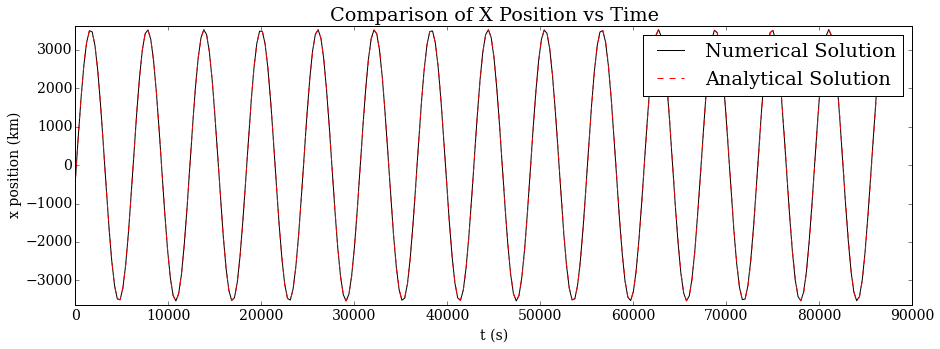

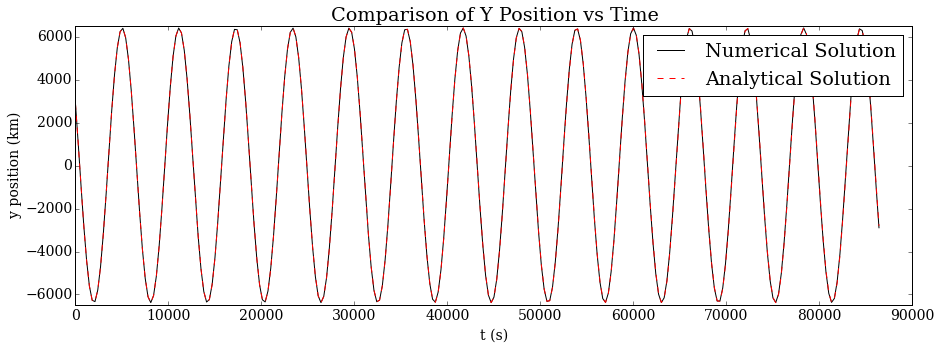

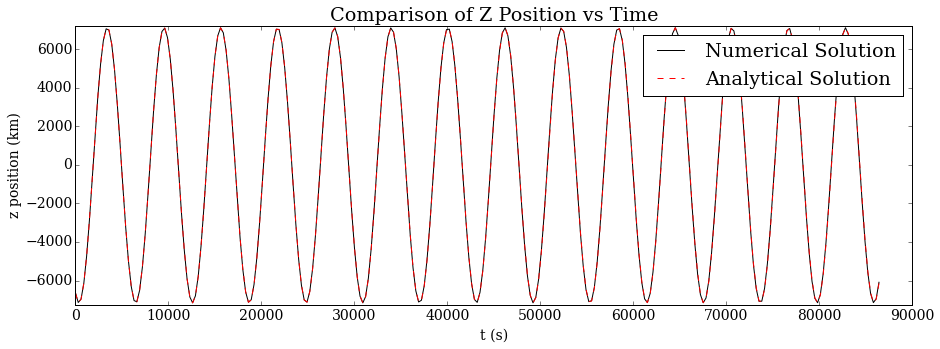

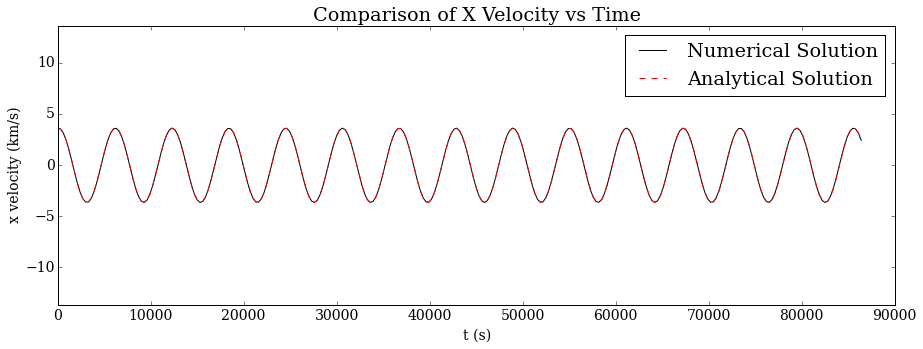

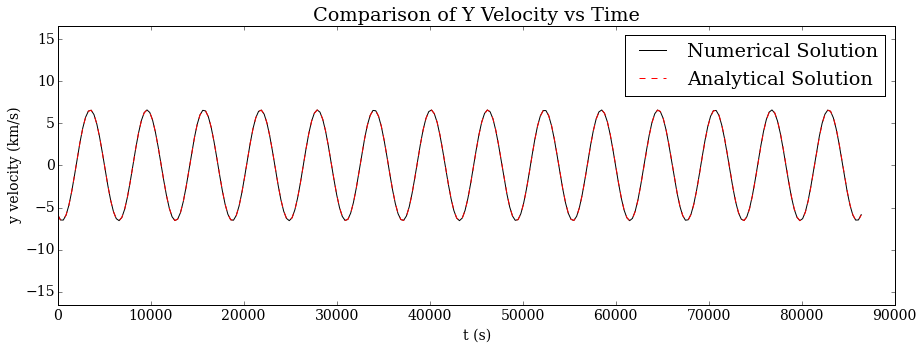

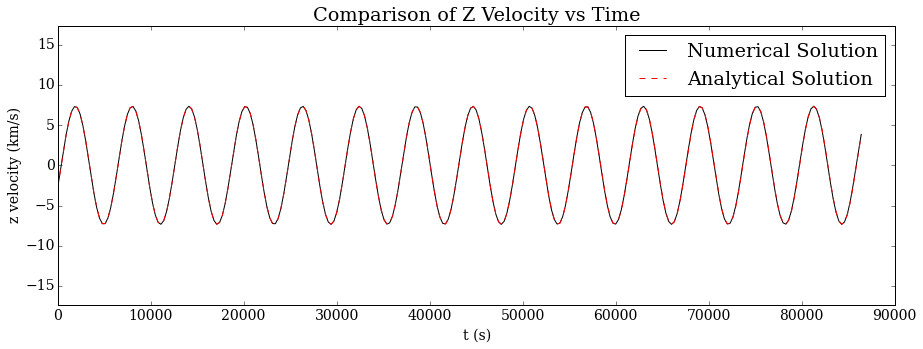

In [13]:
#X Position Component
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of X Position vs Time")
pyplot.ylim(numpy.min(rv[0,:])-100,numpy.max(rv[0,:])+100)  #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('x position (km)', fontsize=14) #y label
pyplot.plot(t,rv[0,:], 'k-')
pyplot.plot(t,rv2[0,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

#Y Position Component
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of Y Position vs Time")
pyplot.ylim(numpy.min(rv[1,:])-100,numpy.max(rv[1,:])+100)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('y position (km)', fontsize=14) #y label
pyplot.plot(t,rv[1,:], 'k-')
pyplot.plot(t,rv2[1,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

#Z Position Component
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of Z Position vs Time")
pyplot.ylim(numpy.min(rv[2,:])-100,numpy.max(rv[2,:])+100)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('z position (km)', fontsize=14) #y label
pyplot.plot(t,rv[2,:], 'k-')
pyplot.plot(t,rv2[2,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

#X Velocity Component 
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of X Velocity vs Time")
pyplot.ylim(numpy.min(rv[3,:])-10,numpy.max(rv[3,:])+10)  #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('x velocity (km/s)', fontsize=14) #y label
pyplot.plot(t,rv[3,:], 'k-')
pyplot.plot(t,rv2[3,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

#Y Velocity Component
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of Y Velocity vs Time")
pyplot.ylim(numpy.min(rv[4,:])-10,numpy.max(rv[4,:])+10)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('y velocity (km/s)', fontsize=14) #y label
pyplot.plot(t,rv[4,:], 'k-')
pyplot.plot(t,rv2[4,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

#Z Velocity Component
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Comparison of Z Velocity vs Time")
pyplot.ylim(numpy.min(rv[5,:])-10,numpy.max(rv[5,:])+10)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('z velocity (km/s)', fontsize=14) #y label
pyplot.plot(t,rv[5,:], 'k-')
pyplot.plot(t,rv2[5,:], 'r--')
pyplot.legend(['Numerical Solution','Analytical Solution']);

Above we can see that there is no discernable difference between the IRK solution and the analytical solution. However, lets plot the absolute error next for each vector component and see what happens as time goes on:

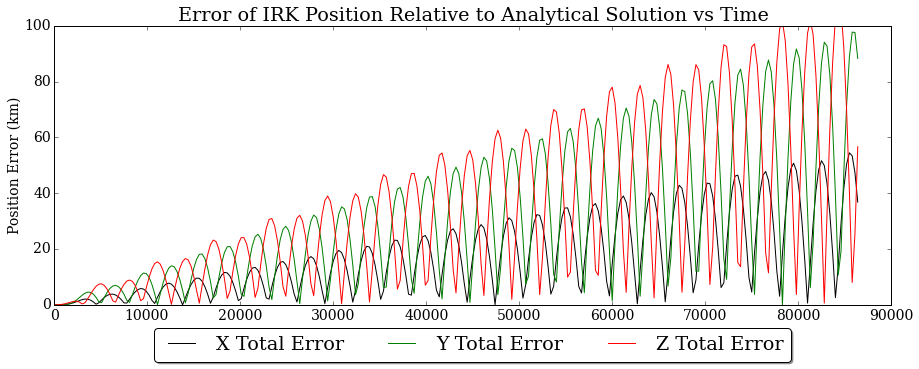

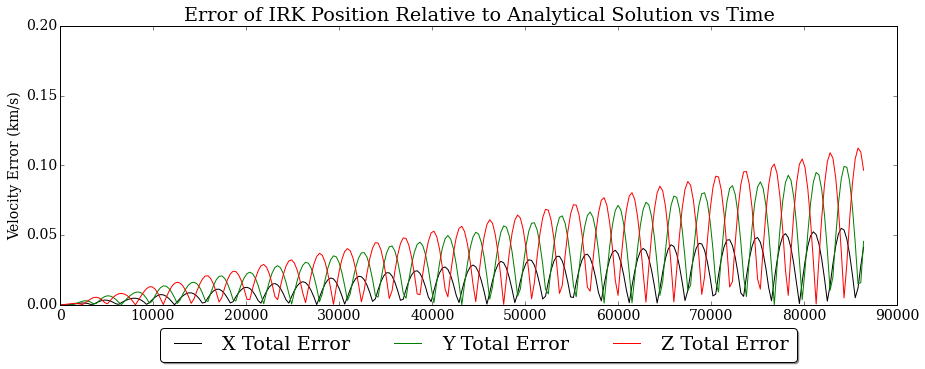

In [14]:
error = abs(rv[:]-rv2[:])

#Position Error
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Error of IRK Position Relative to Analytical Solution vs Time")
pyplot.ylim(0,100)  #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('Position Error (km)', fontsize=14) #y label
pyplot.plot(t,error[0,:], 'k-', label='X Total Error')
pyplot.plot(t,error[1,:], 'g-', label='Y Total Error')
pyplot.plot(t,error[2,:], 'r-', label='Z Total Error')
pyplot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3);

#Velocity Error 
pyplot.figure(figsize=(15,5))   #set plot size
pyplot.title("Error of IRK Position Relative to Analytical Solution vs Time")
pyplot.ylim(0,0.2)  #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (s)', fontsize=14) #x label
pyplot.ylabel('Velocity Error (km/s)', fontsize=14) #y label
pyplot.plot(t,error[3,:], 'k-', label='X Total Error')
pyplot.plot(t,error[4,:], 'g-', label='Y Total Error')
pyplot.plot(t,error[5,:], 'r-', label='Z Total Error')
pyplot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3);

I really wasn't expecting an oscillation in the error curves, but there is certainly growing error. I am not really sure what causes the periodic error, but I can speculate! First off, I was expecting an increase in the error as time progressed due to simple numerical computational error. I first expected this after trying the math.cos() and math.sin() functions. In my COE2RV function I was getting close answers to what I was expecting, but it was far enough to make me check my code. After confirming everything was coded it properly, I deduced that it was the error from the trig functions. That is why I switched to the numpy.sin and cosine functions. I don't believe the time step would be the problem, but it may be just a function of compounding error as time progresses. Lastly, there may be a bug here that I haven't noticed, but considering the answers are exact initially, I don't believe that is the case.

On the other hand, ~100 Km error is pretty significant. An error that large would be detrimental to satellite communication systems. However, for an analysis loaded with assumptions for future systems, it actually isn't that bad. But we'll discuss when and why people use numerical solutions with regards to spacecraft analyses shortly. First, let's take a look at the orbit in 3-D.

### Satellite Tool Kit (STK)
Satellite Tool Kit, also officially known as System Tool Kit, is an industry standard when it comes to anything space related. You can model any type of mission through this software, and it is full of useful features. If it is so great, then why doesn't everyone have one? Well, it is extemely expensive to get a business license (you get into the 6 figure range very quickly after a few licenses). However, you can download a limited version for free! With that, you can model everything we did here and get any type of data you'd like.

Here are two visual outputs using our NOAA19 satellite and exact scenario. Using their Two-Body propagator, which exactly matches up with analytical solution, we get an orbit of:

In [1]:

from IPython.display import YouTubeVideo
YouTubeVideo('r4B9yHXLAgk')

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('jxUit_WfJtM')

The 2D view is called a groundtrace, since it shows the trace of the orbit over the Earth. This is very useful as it shows exactly where the satellite will fly over. Unfortunately, you can only get the visualization from the Windows version, but you can do some great things with STK and Python.

#### Combining Python and STK
STK offers a full API in which one may connect to via COM model objects or TCP/IP. If you are using a Windows machine, you can use either method, but if you are using any other system, TCP/IP is your only solution. I know people prefer to use Mac's, but chances are if you are using STK, you are on a PC, so I am going to cover how to connect to a PC with Python.

TCP/IP is a very useful way to connect to STK, however, newer versions of the tool are no longer supporting that method, so if you are using STK version 10 or higher, you are relegated to COM only. I know, it stinks. But, to get the connection up, all you need to do is:


In [ ]:
import os
import win32com.client 

root=win32com.client.Dispatch("STK.Application")

The import os call may not be necessary depending on how you are running the application, but the import win32.client is what you will be using to create the STK-Python connection. To actually create the connection, you need to use the last command and call the STK.Application.

Once you are connected, you can start creating objects.

To create a new scenario, you would type (doesn't need to be a function):

In [ ]:
def Scenario():
    root.Personality.ExecuteCommand ("New / Scenario NameHere")
    root.Personality.ExecuteCommand ("SetAnalysisTimePeriod * \"13 Dec 2015 17:00:00.00\" \"14 Dec 2015 17:00:00.00\"") 

If you are going to use the report functionality of STK, which is the data that is generated like access reports, state vectors, coverage time and a lot more, you can create a path to store it using this call:

In [ ]:
path="\"C:/ExampleDirectory/"
root.Personality.ExecuteCommand ("ReportCreate */Satellite/SatNameHere Type Export Style \"Access\" File"+" "+path+"file.csv\" AccessObject */Facility/FacilityNameHere")

Finally, if you wanted to create an object like a satellite or a facility on the Earth you can use the following:

In [ ]:
#Creates a new satellite named SatNameHere
root.Personality.ExecuteCommand ("New / */Satellite SatNameHere")
#Creates the COE for SatNameHere (using the ones we defined up above)
root.Personality.ExecuteCommand ("OrbitWizard */Satellite/SatNameHere" OrbitDesigner SemimajorAxis 7221.418049 Eccentricity 0.003489 Inclination 98.942 ArgumentOfPerigee 53.907 RAAN 298.005 TrueAnomaly 194.089)                                

#Create a Facility
root.Personality.ExecuteCommand ("New / */Facility/FacilityNameHere")
#Set the Facility's Geodetic Latitude, Longitude, and Alitude at 0.0 deg, 0.0 deg, 0.0 m
root.Personality.ExecuteCommand ("SetPosition */Facility/FacilityNameHere" Geodetic 0.0 0.0 0.0)

#### STK API for All Other Function Calls

The reason why people use the API is because often times analyses are complex and require many inputs. It is much faster to create a script to generate everything and run the analysis than it is to use the STK GUI and try to type everything. Using the root.Personality.ExecuteCommand() call, you can use STK's API to do everything you need. You can find [STK's API here](http://www.agi.com/resources/help/online/stk/10.1/index.html?page=source%2Fextfile%2Fconnect%2Fusingcon.htm).
***

### Conclusion

The Implicit Runge Kutta method managed to deliver decent results, but the analytical solution is the best approach for this case. That brings up the question, "why use numerical solutions for orbit propagation?" Well, first off, the two-body problem is one of the simpler problems. Orbital mechanics is deceivingly hard. When you start to account for perturbation effects (J2,J4), atmospheric drag, n-body gravitational effects (moon, sun), solar radiation, and quite a few other things, there is no analytical solution. The best approach is to create a force model, and then apply that to your governing equation, which you solve through numerical methods. Even STK uses an 8th order numerical method for their high precision propagators. Ultimately, difficult problems can only be solved via numerical methods. 

Explicit methods work very well in orbit propagation, so you don't need to choose an implicit method. However, I haven't worked much with implicit methods before, so I figured I'd give it a shot. Additionally, [3] states that the force models can be parallelizable when using IRK, which means you can gain a significant speed boost. That being said, explicit methods are easier to implement, so both have their trade-offs.

Ultimately, numerical methods are extremely useful in orbit propagation, but sometimes they are not the best solution. In the case of a two-body propagator, you would be very wise to use the analytical solution over an explicit/implicit method. Typically, people use two-body propagation as a rough estimate anyway. When designing future space systems, there are ***many*** assumptions that go into the design including the orbit. Therefore, the analysis is only as good as the assumptions being made. Even if you have the best propagator with the ideal numerical solver, you can still get bad answers. Numerical solutions are essentially tools an engineer can use to help solve a problem, and it's up to their judgment what the best tool to use is. In conclusion, the IRK method isn't the best tool to use the two-body problem, since the analytical solution is the best solution. However, for more challenging propagation problems, numerical solutions are the only option to find a result. If you are in the professional world dealing with spacecraft, chances are you will use STK for propagation, but you very well may end up using Python to create and run the entire analysis.



### References
* [1]  Vallado, David A., and Wayne D. McClain. Fundamentals of Astrodynamics and Applications. Hawthorne, CA: Microcosm, 2013. Print.
* [2]  Bate, Roger, Donald D. Mueller, and Jerry E. White. Fundamentals of Astrodynamics. New York: Dover Publications, 1971. Print. 
* [3] [Aristoff, Implicit Runge Kutta Methods for Orbit Propagation](http://www.numerica.us/wp-content/uploads/2014/12/Implicit_Runge-Kutta_methods_for_orbit_prop_ASC2012Minn_Aristoff_Poore_final.pdf)
* [4]  Griffin, Michael D., and James R. French. Space Vehicle Design. Reston, VA: American Institute of Aeronautics and Astronautics, 2004. Print. 